In [1]:
import os
from os import path
import numpy as np
import copy
import pandas as pd
import ipython_bell

from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
from astropy.visualization import make_lupton_rgb
import sys

In [2]:
#Makes 3 plots per image: source simulation, lens cutout, complete simulation
def make_graphs(name, sim_i, sim_r, sim_g, cutout_i, cutout_r, cutout_g):
    loc = plticker.MultipleLocator(base=3.75)
    fig, (ax1, ax2, ax3) = plt.subplots(figsize=(15, 4), ncols=3)

    rgb = make_lupton_rgb(sim_i, sim_r, sim_g, Q=11., stretch=40.)
    ax1.set_title('Source(s)')
    ax1.xaxis.set_ticklabels([])
    ax1.yaxis.set_ticklabels([])
    #ax1.xaxis.set_major_locator(loc)
    #ax1.yaxis.set_major_locator(loc)
    #ax1.grid(which='major', axis='both', linestyle='-')
    original = ax1.imshow(rgb, aspect='equal')#, vmin=0, vmax = 250)
    #fig.colorbar(original, ax=ax1)

    rgb = make_lupton_rgb(cutout_i, cutout_r, cutout_g, Q=11., stretch=40.)
    ax2.set_title('Lens')
    ax2.xaxis.set_ticklabels([])
    ax2.yaxis.set_ticklabels([])
    #ax2.xaxis.set_major_locator(loc)
    #ax2.yaxis.set_major_locator(loc)
    #ax2.grid(which='major', axis='both', linestyle='-')
    cutout = ax2.imshow(rgb, aspect='equal')
    #fig.colorbar(cutout, ax=ax2)
            
    rgb = make_lupton_rgb(sim_i+cutout_i, sim_r+cutout_r, sim_g+cutout_g, Q=11., stretch=40.)
    ax3.set_title('Complete Simulation')
    ax3.xaxis.set_ticklabels([])
    ax3.yaxis.set_ticklabels([])
    #ax3.xaxis.set_major_locator(loc)
    #ax3.yaxis.set_major_locator(loc)
    #ax3.grid(which='major', axis='both', linestyle='-')
    projection = ax3.imshow(rgb, aspect='equal')
    #fig.colorbar(projection, ax=ax3)
    sub_path = '/Users/jimenagonzalez/research/DSPL/Simulations-Double-Source-Gravitational-Lensing/'
    #plt.savefig(sub_path + 'Data/Sim_complete/Image' + name + '.png', bbox_inches='tight')
    plt.show()

In [3]:
def complete_simulations(m, ids):
    directory_sim = '/Users/jimenagonzalez/research/DSPL/Simulations-Double-Source-Gravitational-Lensing/Data/Sim/'
    directory_cutouts = path + 'Data/lens_cutouts/'
    end_name = ['_g.fits', '_i.fits', '_r.fits']
    x = np.zeros((1,3,46,46)) #Complete Simulations
    n = 0
    for lens_id in ids:
        path_sim_id = directory_sim + str(lens_id)
        if(n >= m):
            break
        #check that the sim id folder exist (if not continue)
        if(os.path.exists(path_sim_id) == False):
            continue
        num_sim_id = int(len(os.listdir(path_sim_id))/3) # num sim with same lens
        #loop on each simulation produced using the same lens
        for j in range(1, num_sim_id+1):
            n += 1 #number of total simulations
            path_cutout = directory_cutouts + str(lens_id) 
            path_sim = path_sim_id + '/' + str(j)
            if(os.path.exists(path_cutout + end_name[0]) == False): 
                continue
            with fits.open(path_cutout + end_name[0]) as hdul: cutout_g = hdul[0].data
            with fits.open(path_cutout + end_name[1]) as hdul: cutout_i = hdul[0].data
            with fits.open(path_cutout + end_name[2]) as hdul: cutout_r = hdul[0].data
            with fits.open(path_sim + end_name[0]) as hdul: sim_g = hdul[0].data
            with fits.open(path_sim + end_name[1]) as hdul: sim_i = hdul[0].data
            with fits.open(path_sim + end_name[2]) as hdul: sim_r = hdul[0].data
            sum_cut = np.sum(cutout_g) + np.sum(cutout_i) + np.sum(cutout_r)
            sum_sim = np.sum(sim_g) + np.sum(sim_i) + np.sum(sim_r)
            ratio = sum_sim/(sum_cut+sum_sim)
            print(ratio)
            ele_sim = np.array([cutout_g + sim_g, cutout_r + sim_r, cutout_i + sim_i])
            x = np.append(x, [ele_sim], axis = 0)
            #if()
            make_graphs(str(lens_id), sim_i, sim_r, sim_g, cutout_i, cutout_r, cutout_g)
    x = np.delete(x, 0, axis = 0)
    return(x)

0.11034416384791505


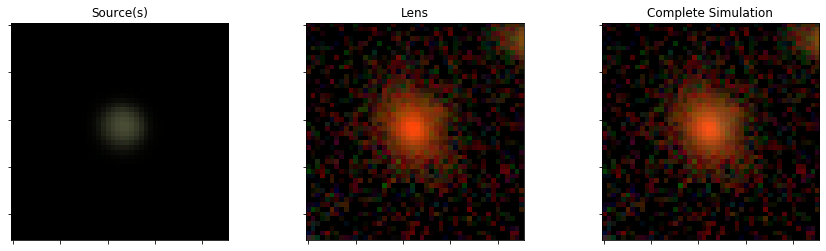

0.08364408724259605


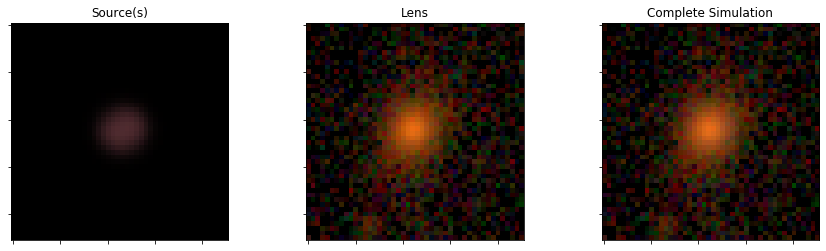

0.04739607395972641


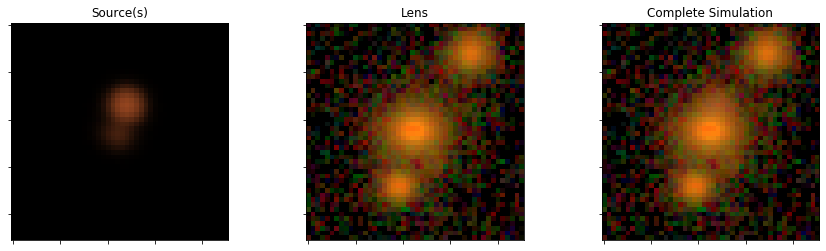

0.14114401052699263


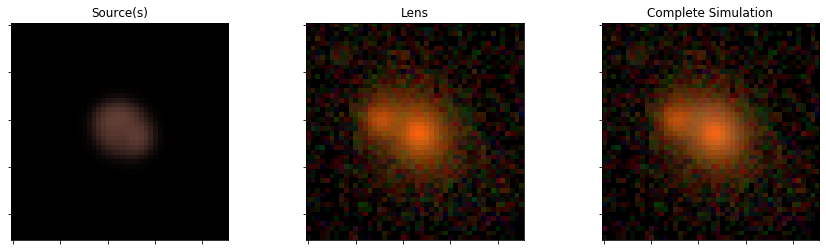

0.037026567831985206


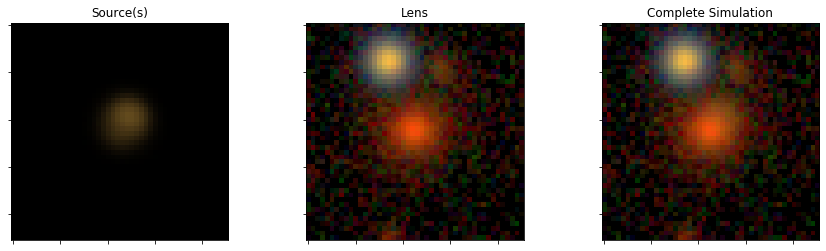

0.06523054205507586


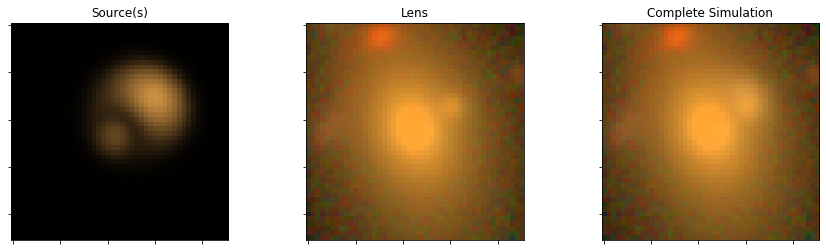

0.05891044355346419


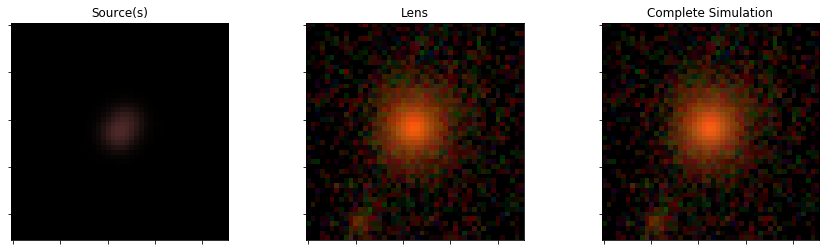

0.15899149388792644


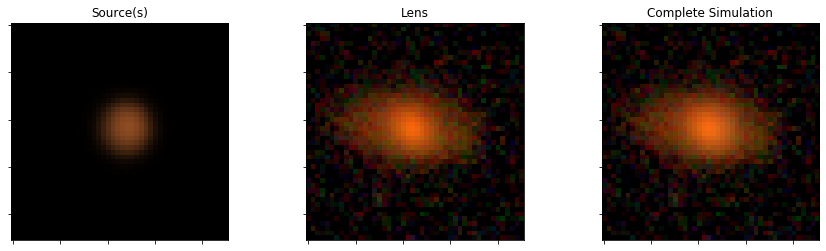

0.0846390532956243


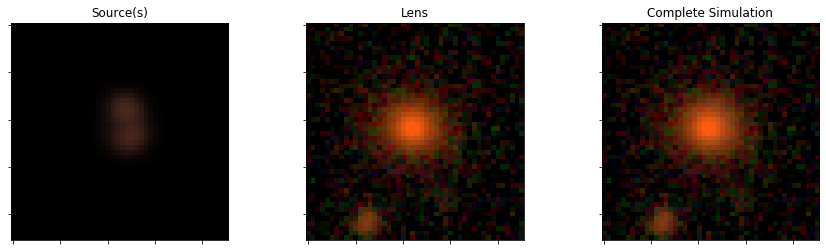

0.07101799420883355


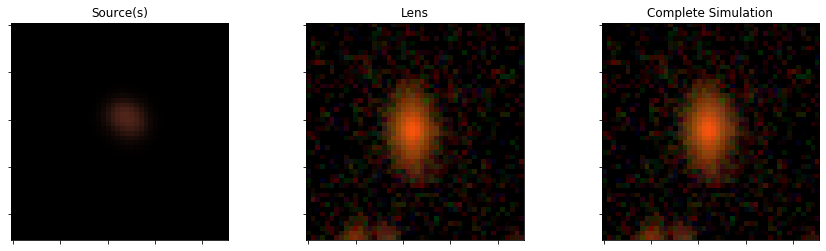

0.15749389900365215


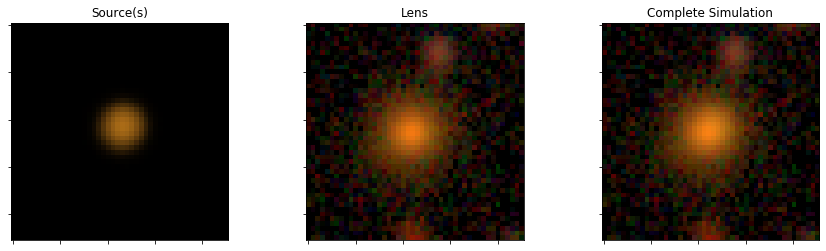

0.09325022966941131


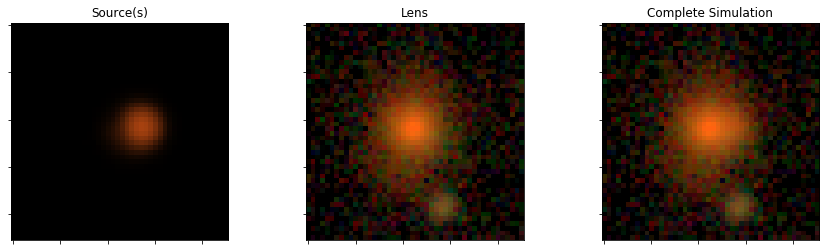

0.10995910029929215


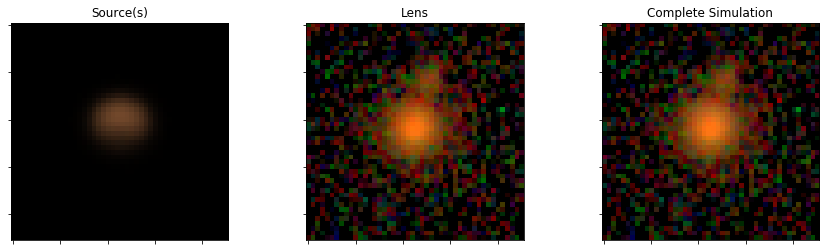

0.11883061077775113


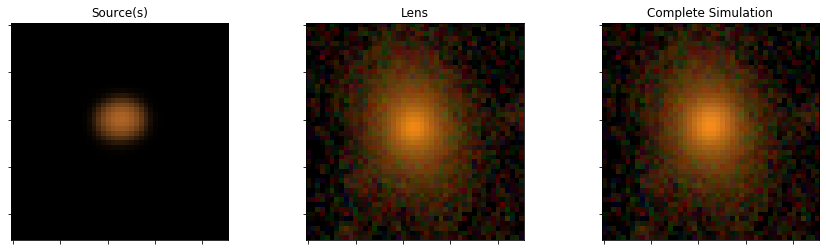

0.07240429010316847


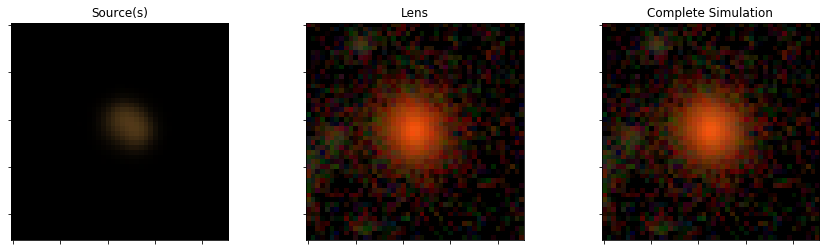

0.022117129974817358


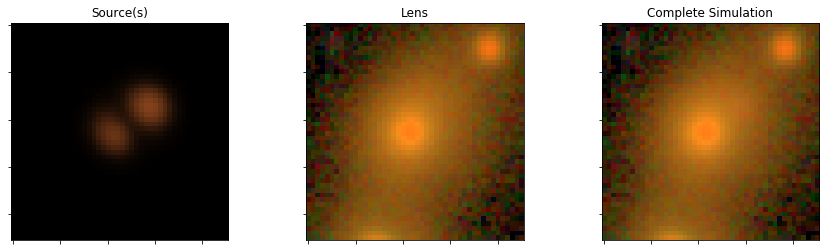

0.011591186525922824


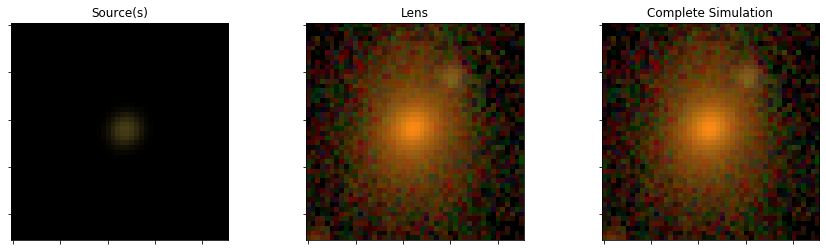

0.00717948834729327


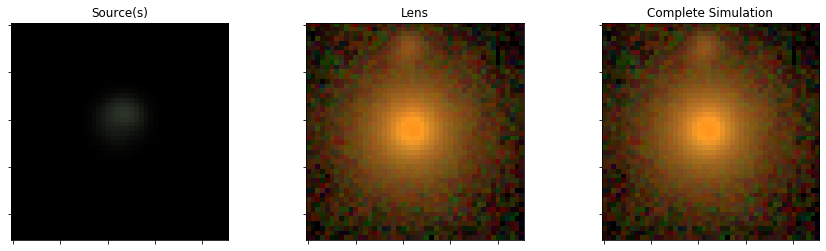

0.05558783343141572


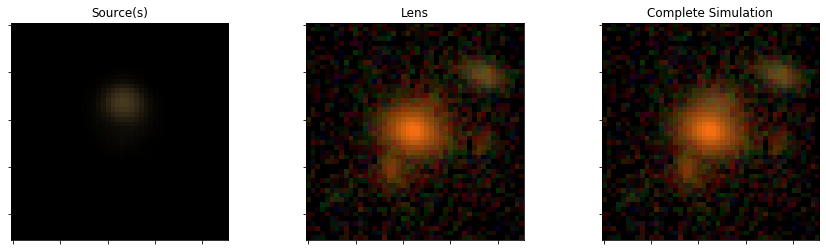

0.3063392948508257


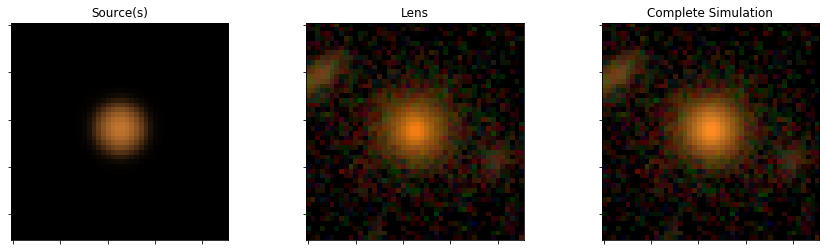

0.05375299490060782


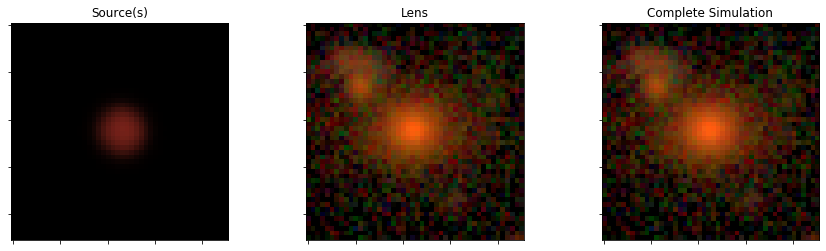

0.04334729127311297


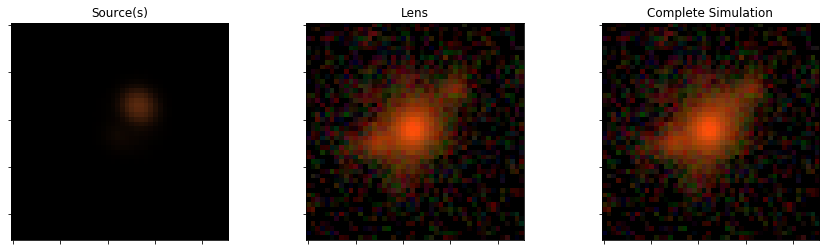

0.061293190288256874


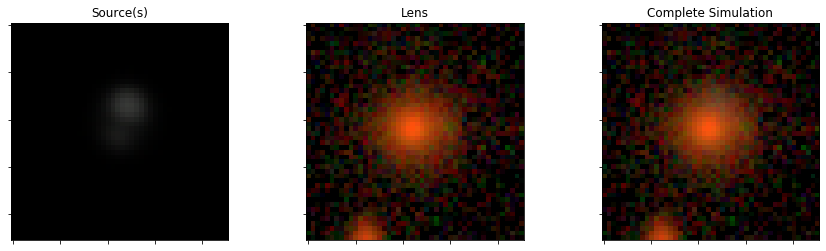

0.1325297427178848


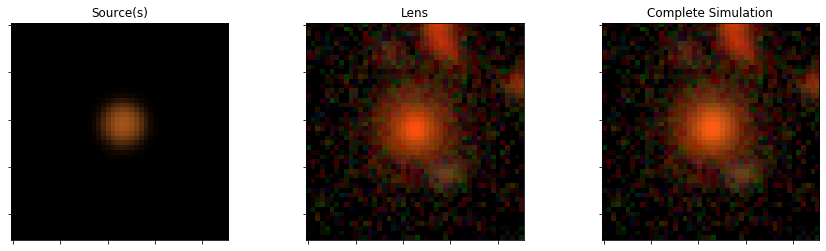

0.03722938855862554


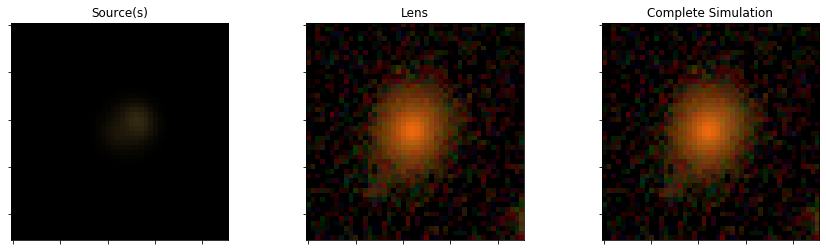

0.0905195267751532


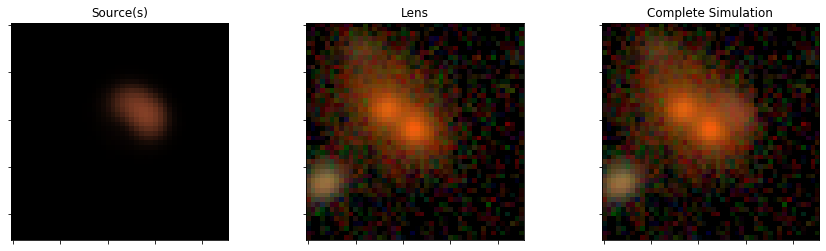

0.047705009621281186


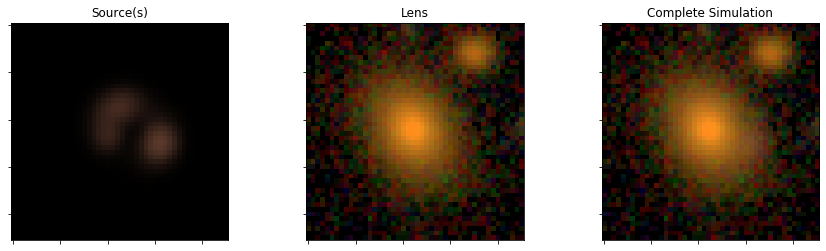

0.08156471957828476


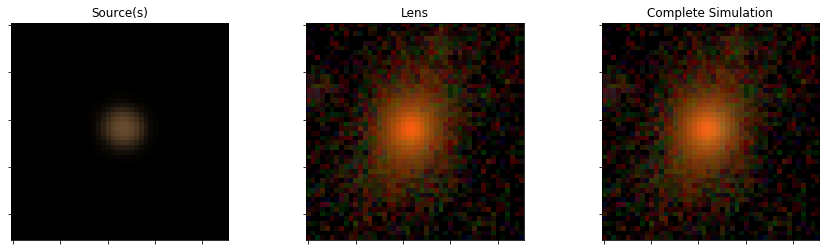

0.054295096471939384


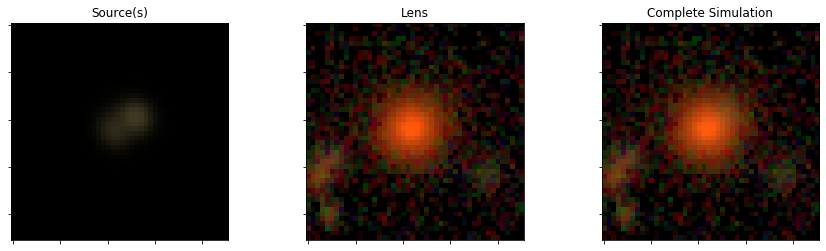

0.03282659175552914


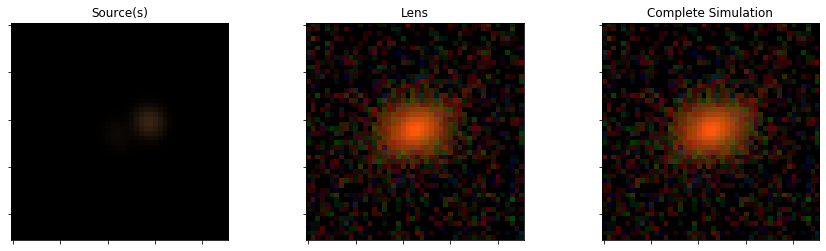

0.04400449546303414


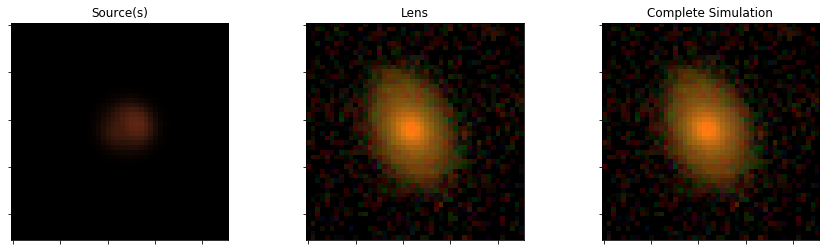

0.07682674647513357


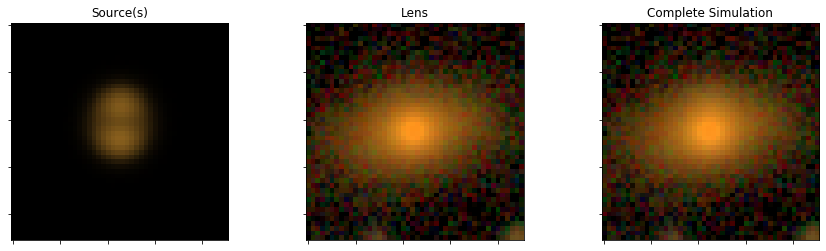

0.13332862750598215


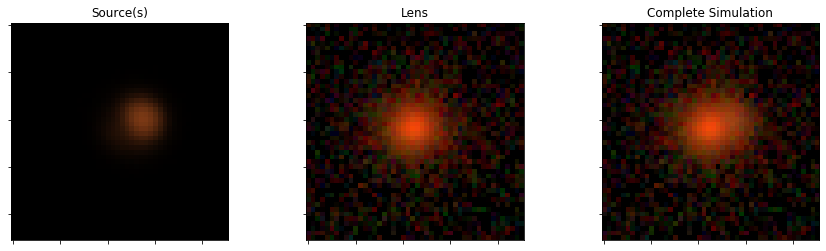

0.05697545026791902


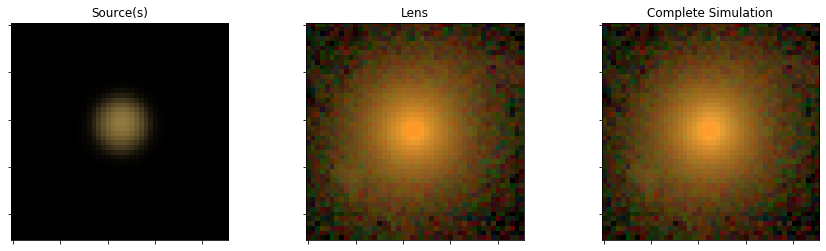

0.1859904328673006


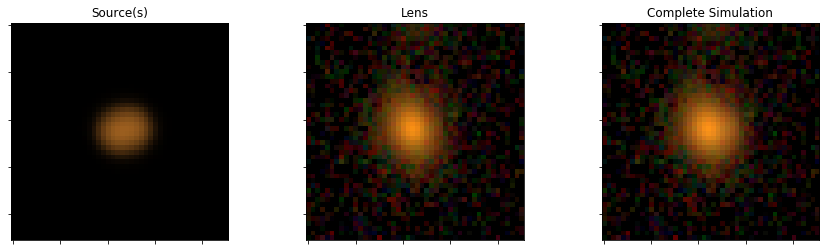

0.1446346503370862


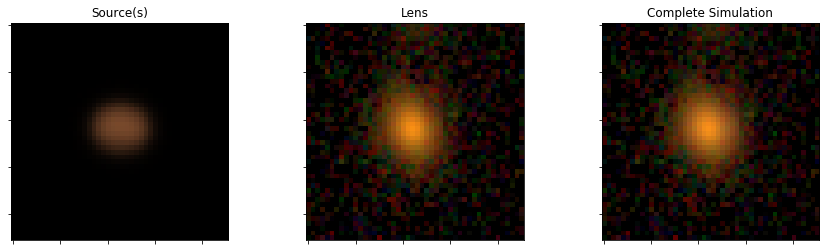

0.0021483758648219715


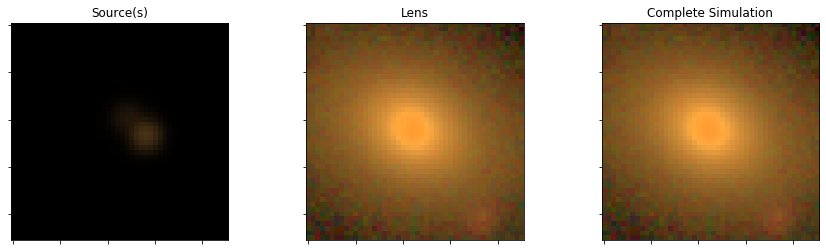

0.027530769223010156


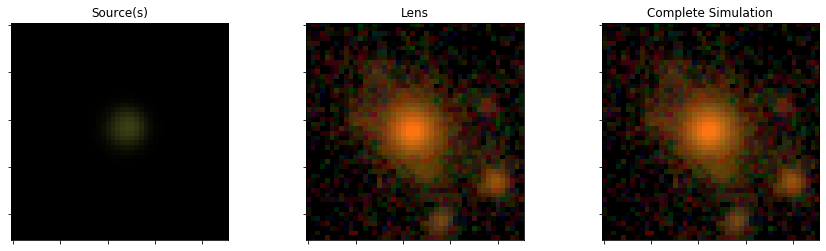

0.05050402748357385


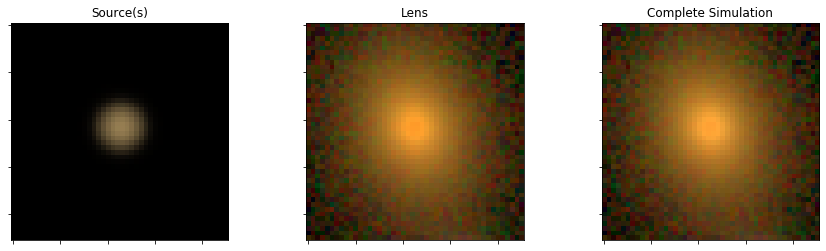

0.012365266747364516


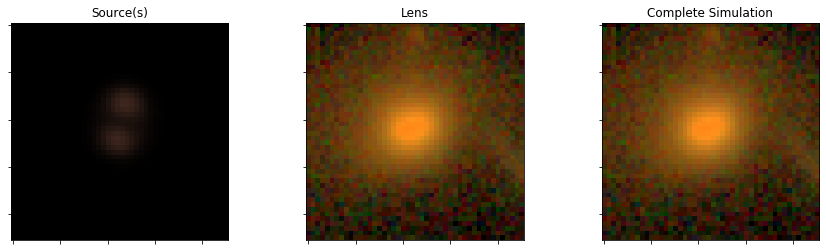

0.0048183150848724685


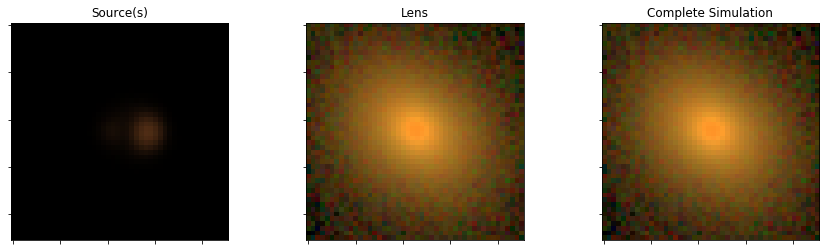

0.04930712039499945


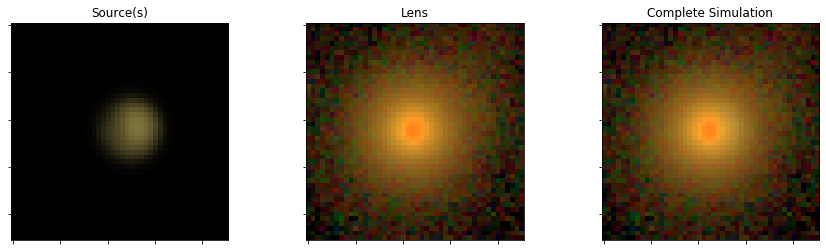

0.006724549765685152


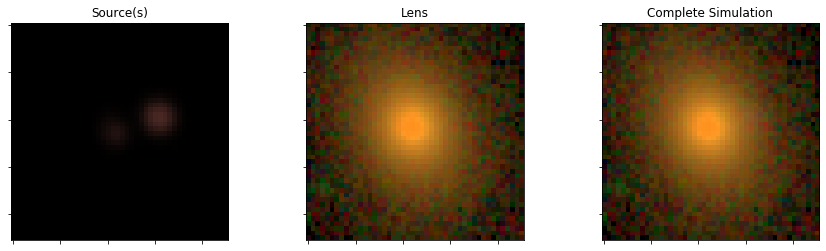

0.04833181244913471


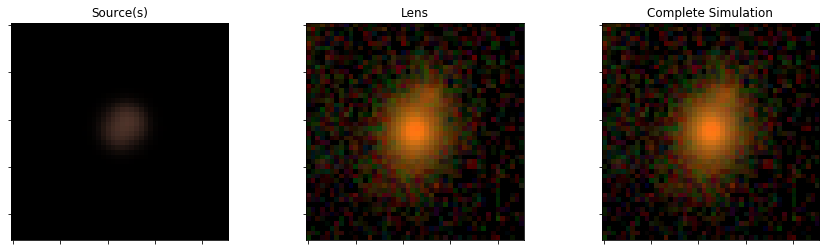

0.04719202778430575


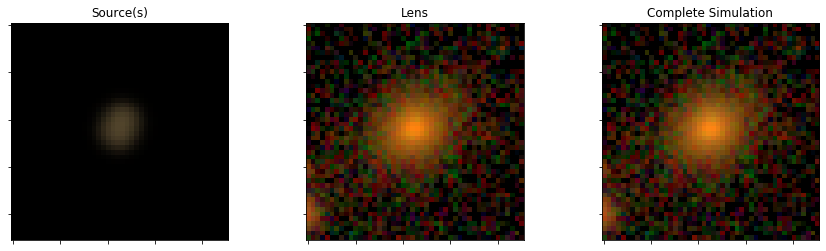

0.25883828310744145


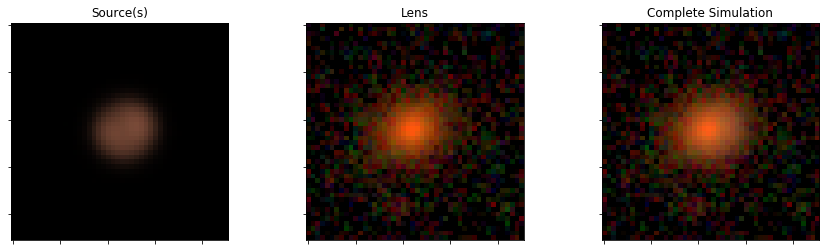

0.020833623399867385


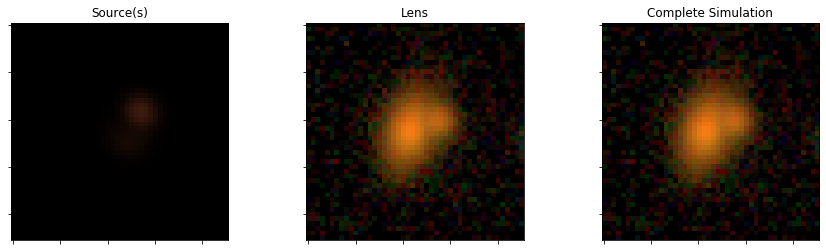

0.1029996807096561


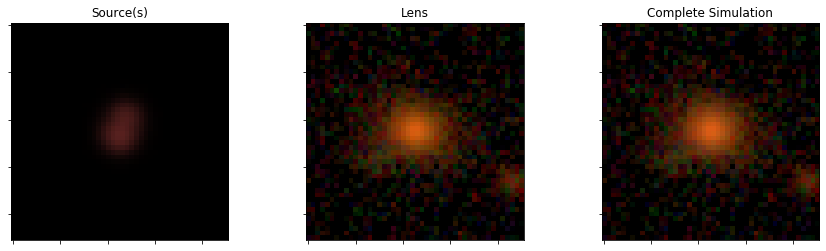

0.03598350239382864


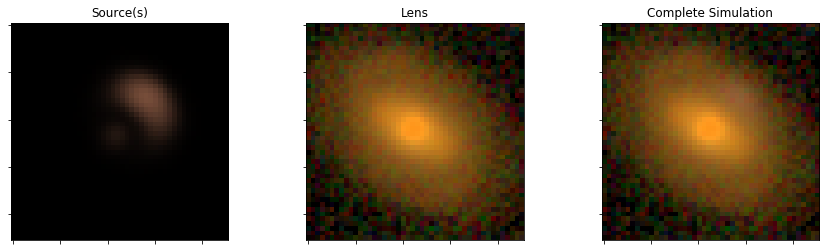

0.01836501491048508


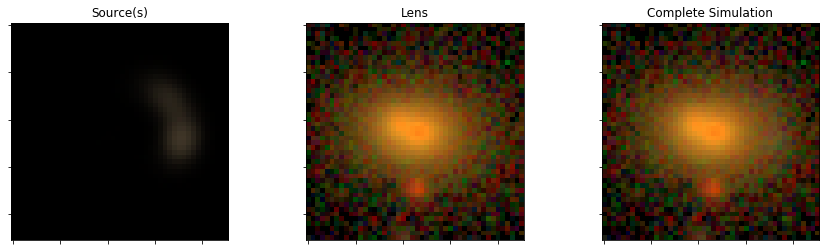

0.02677577689422653


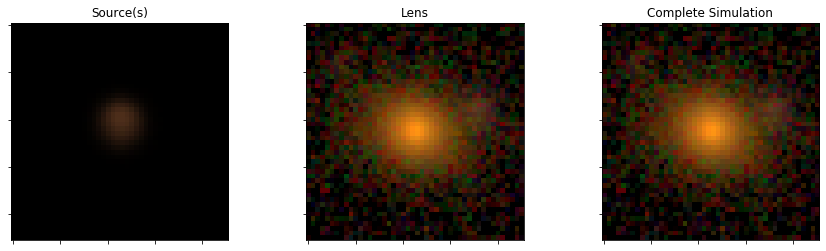

0.011695278662789538


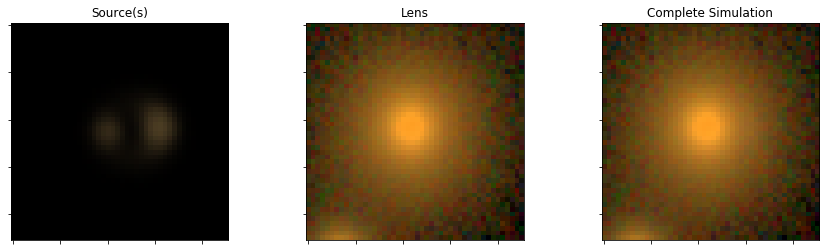

0.030486052495421755


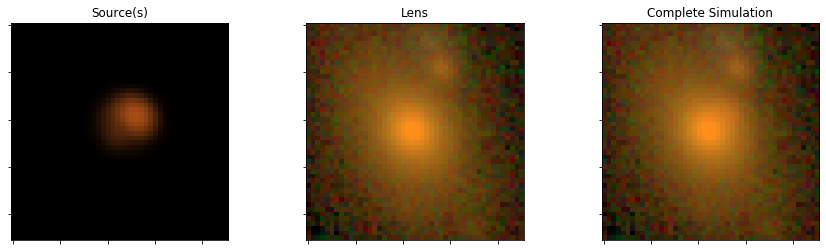

0.028221735181745342


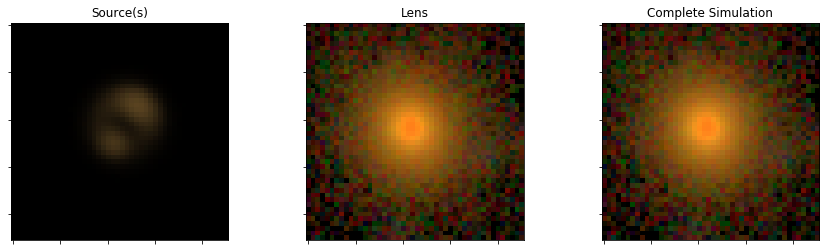

0.02661011888631059


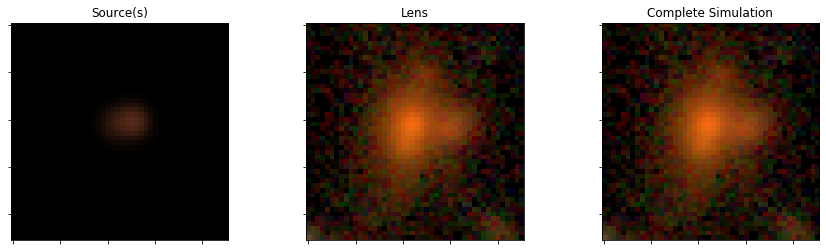

0.05368243234459283


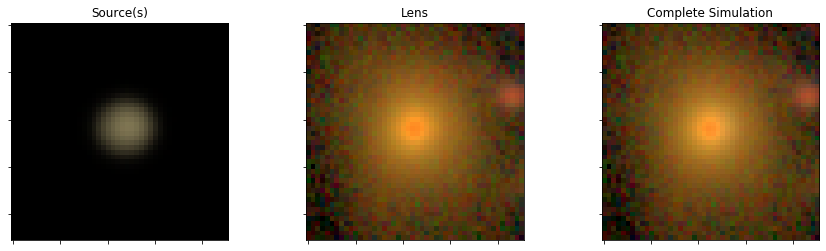

0.04468730048836643


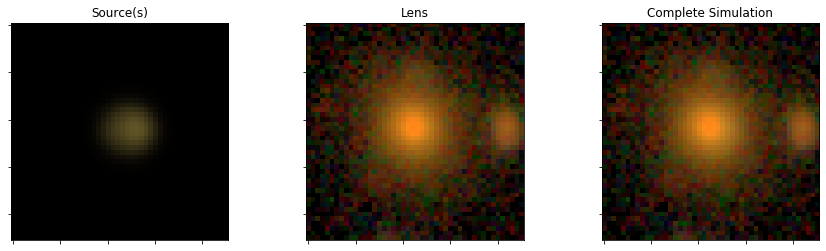

0.1224573197812036


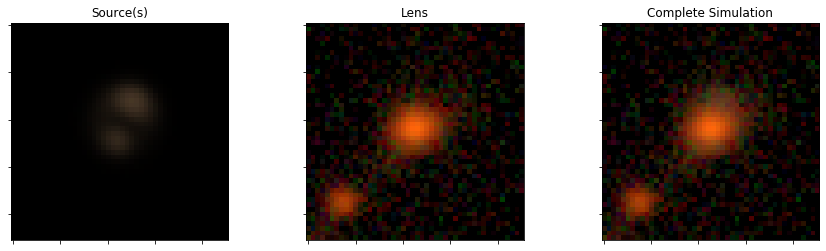

0.04265619060462552


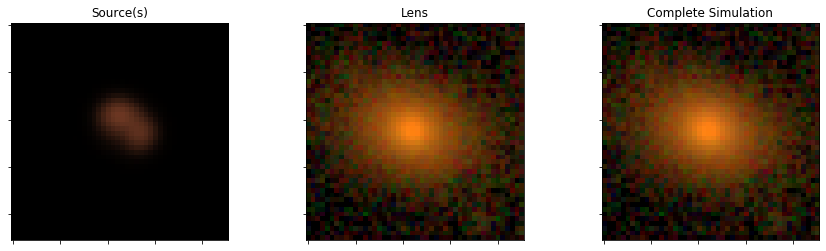

0.0626746844054754


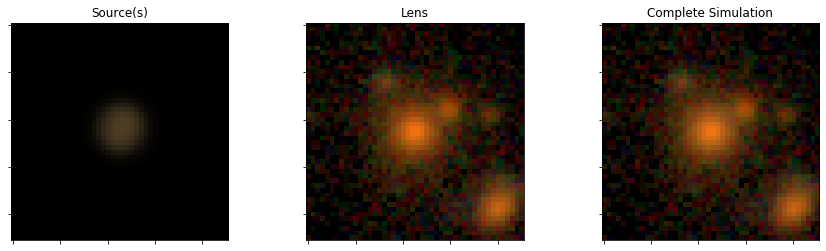

0.17307332460340688


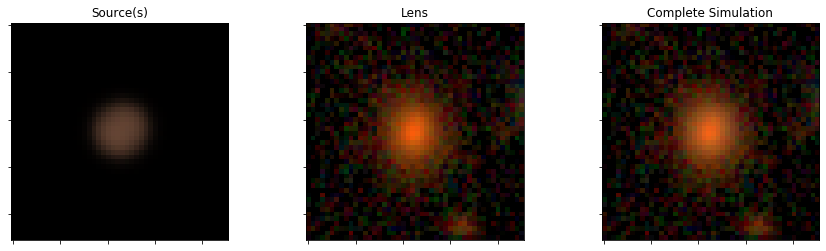

0.025501091703660408


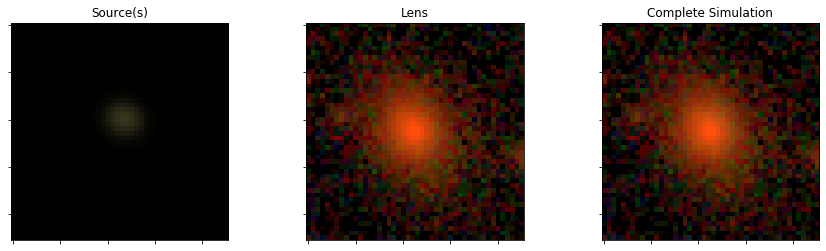

0.009467866423334038


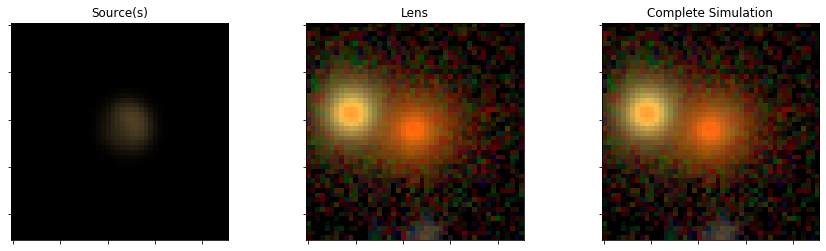

0.02396930722950148


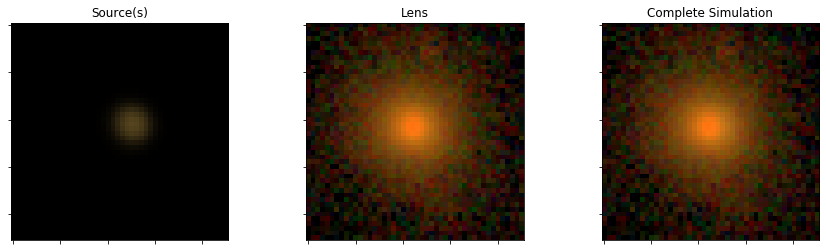

0.02220607653662584


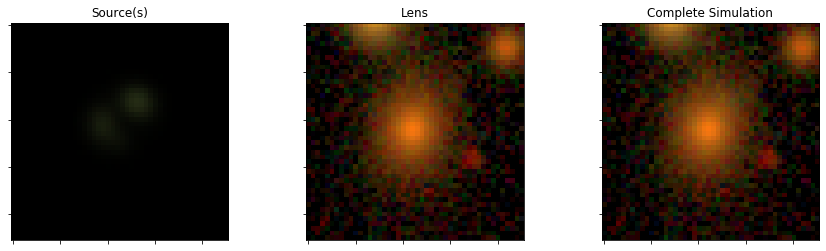

0.01608254342283647


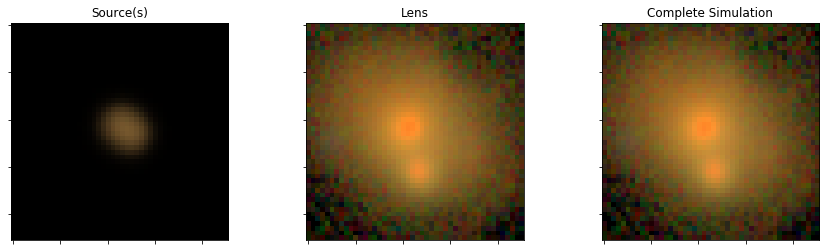

0.046677801431073994


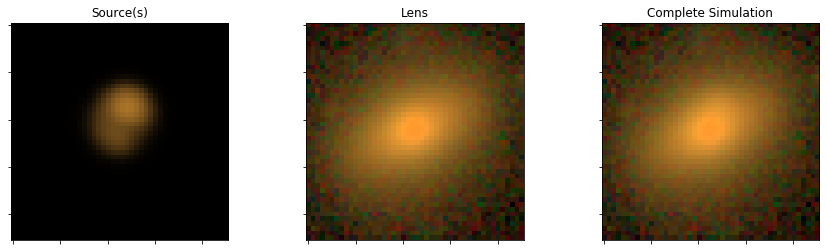

0.02056907255390144


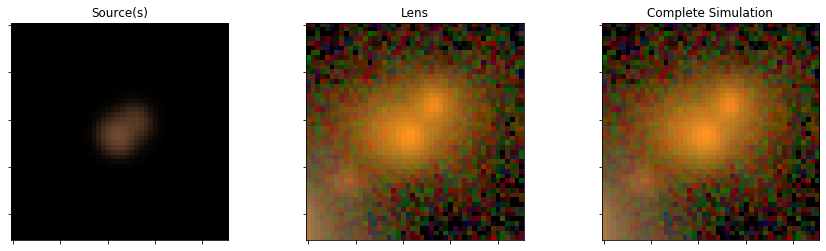

0.044377489037447426


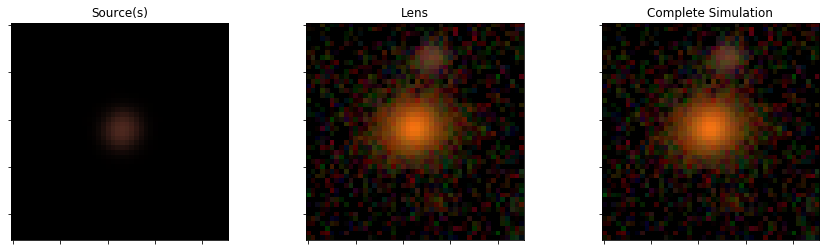

0.06459581395156487


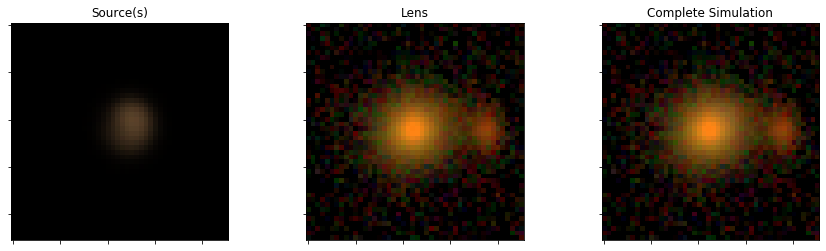

0.011573331129420612


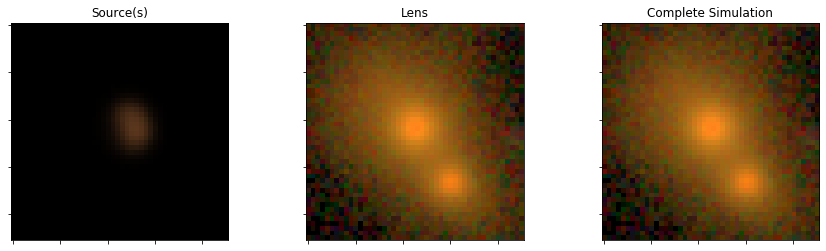

0.029737466019202803


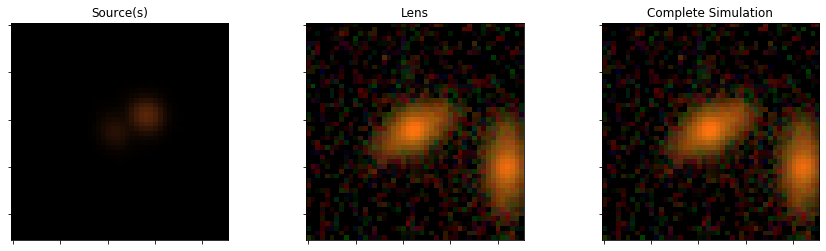

0.05695108100121357


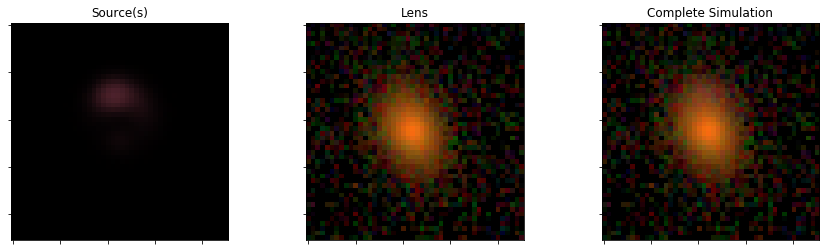

0.061111519434761966


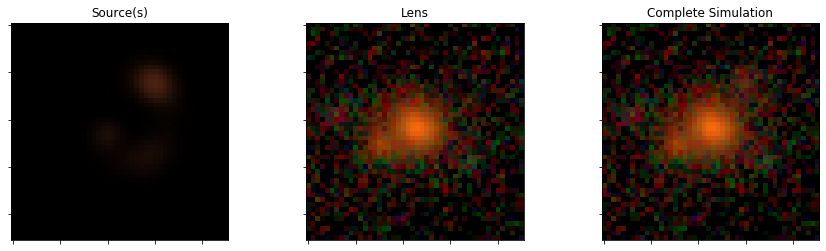

0.09567312786626211


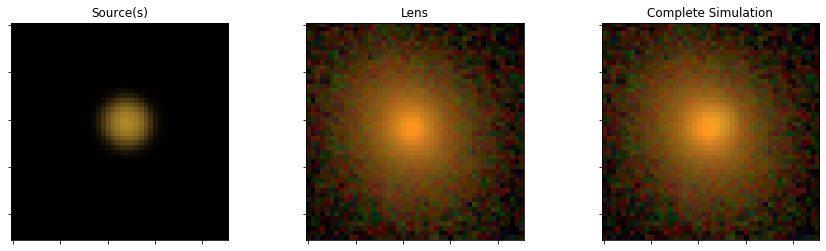

0.1230951544919444


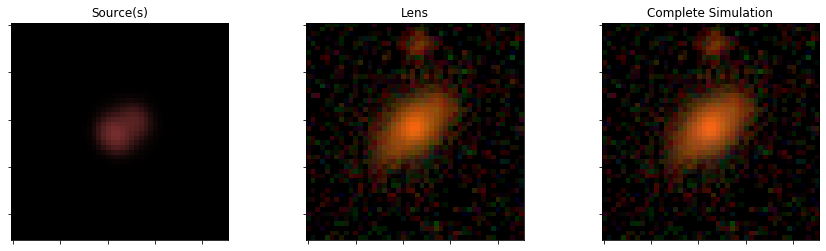

0.10498309578686693


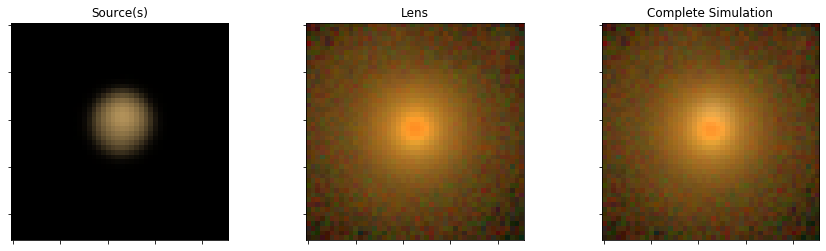

0.02096516943996405


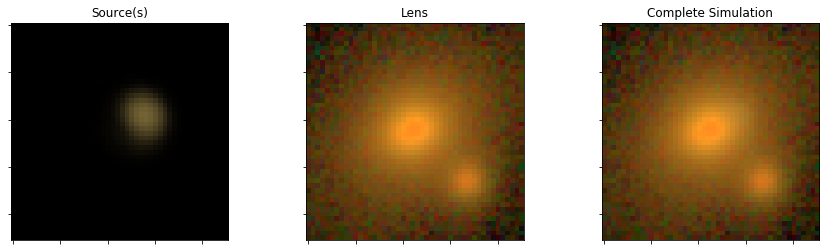

0.11268655285643175


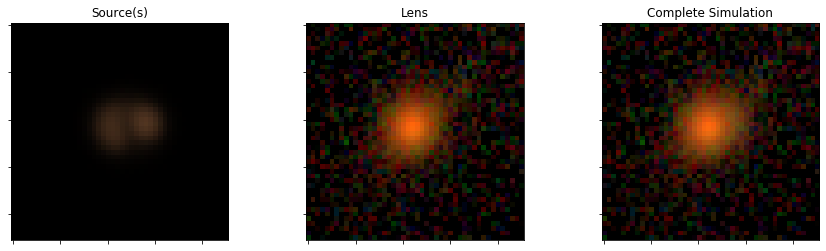

0.0847280424983542


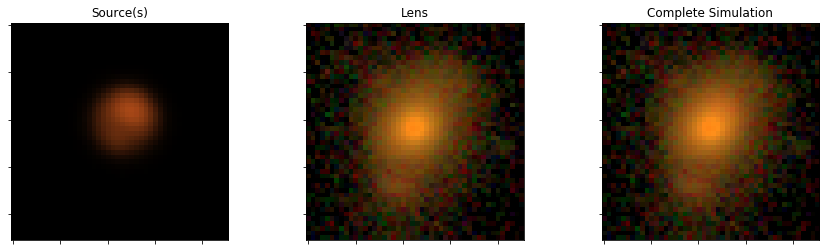

0.016010127054702644


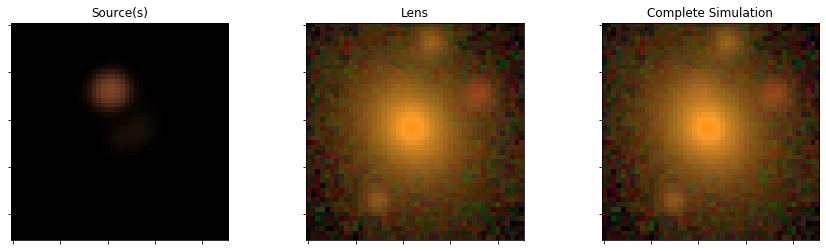

0.06342702443017396


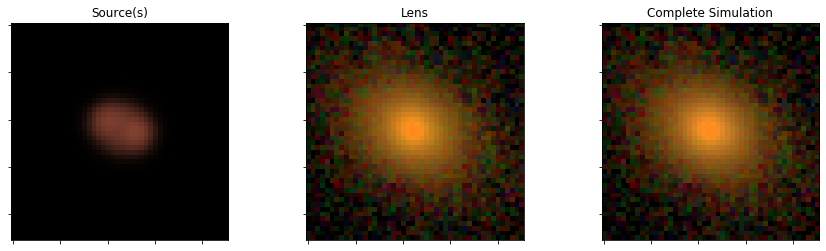

0.05472394980061505


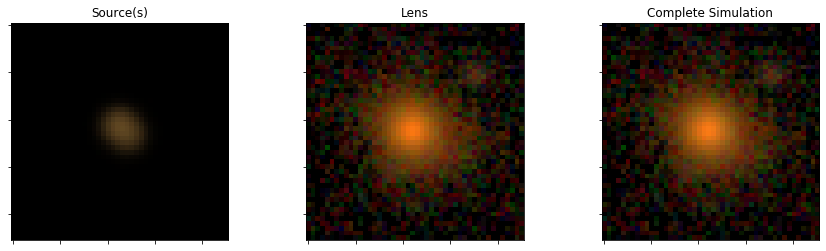

0.10648685615125557


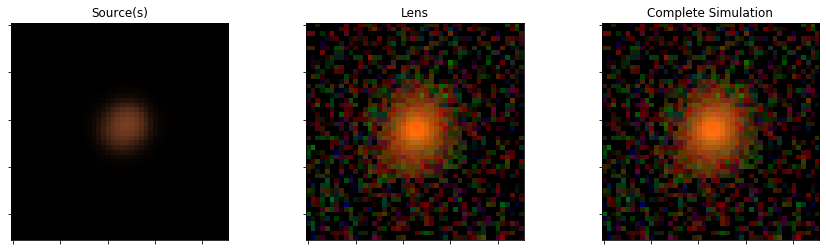

0.05319733628797385


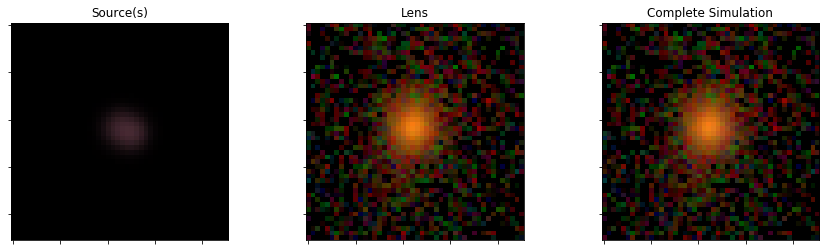

0.025803527361014503


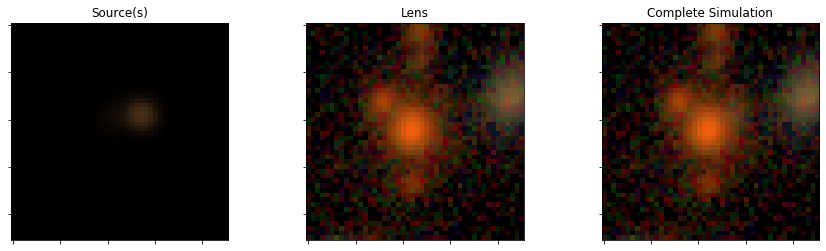

0.019974446077266644


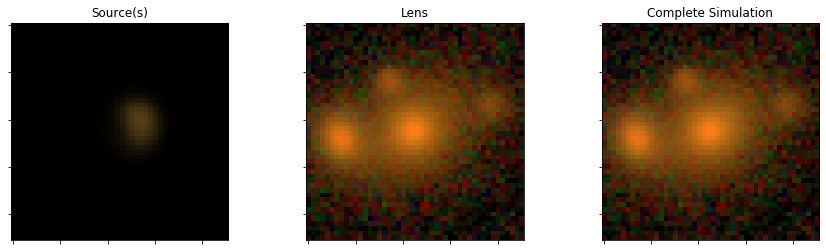

0.11777848645641731


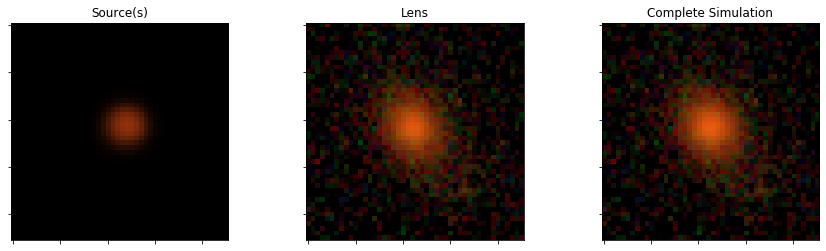

0.08261903436213057


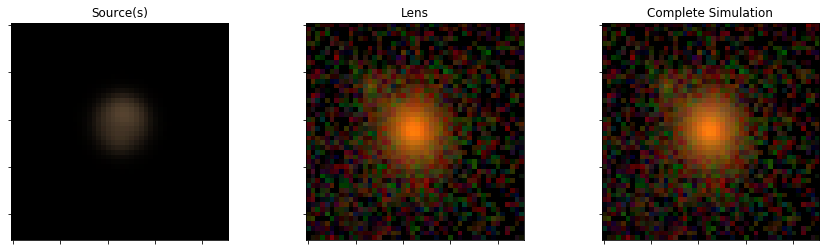

0.05469775701454376


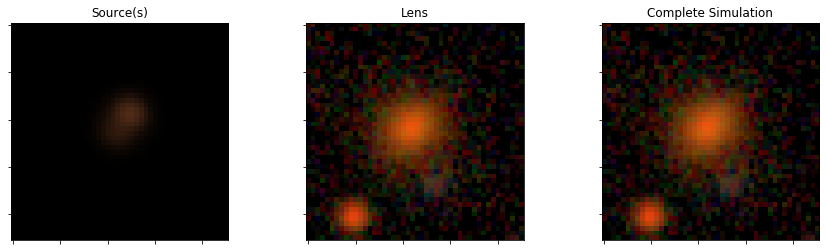

0.008525185794615718


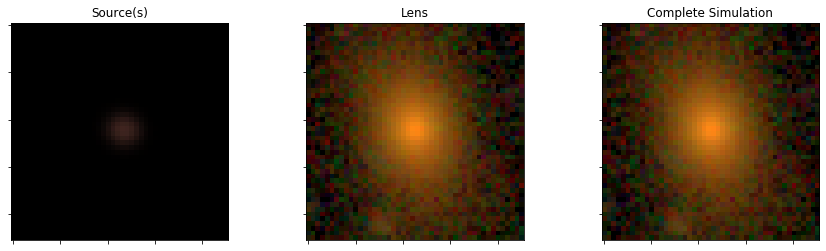

0.024196502994426317


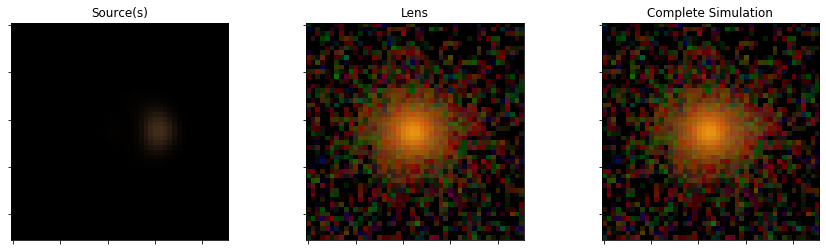

0.007410406060379388


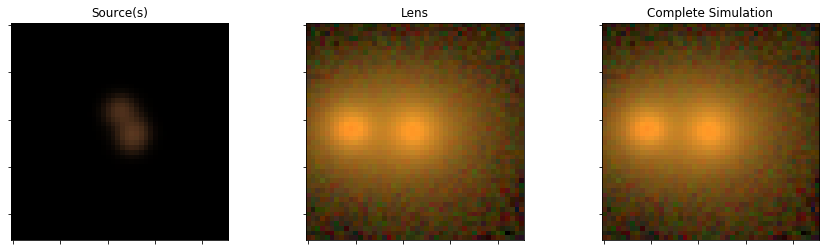

0.038065115376270296


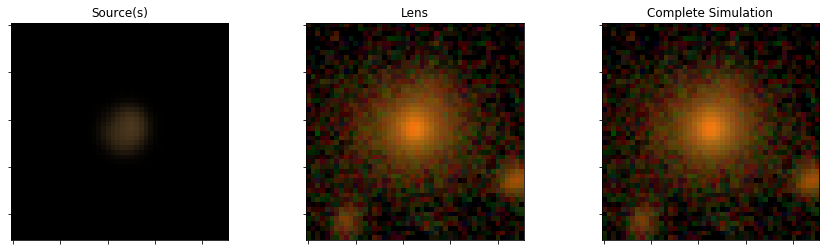

0.15098126700027018


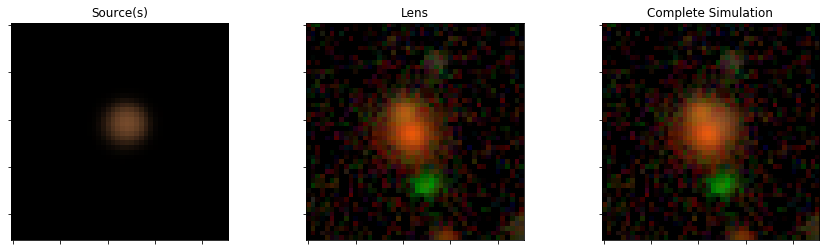

0.0901338943036528


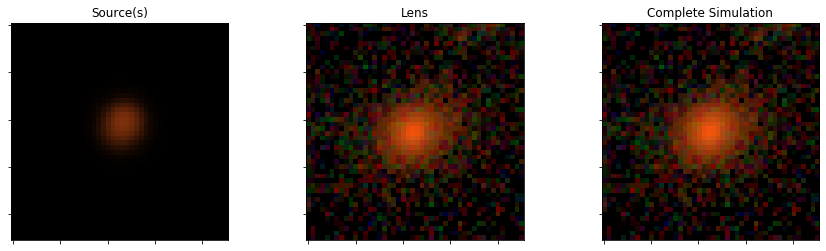

0.09243951872543667


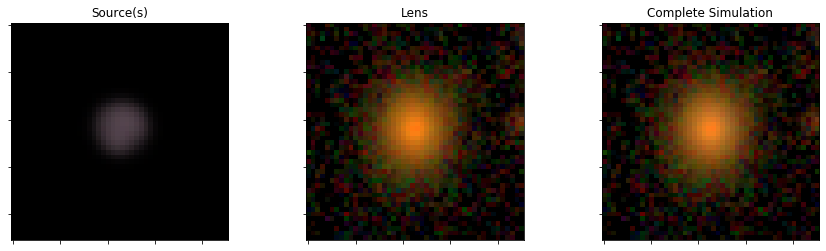

0.07199241303849079


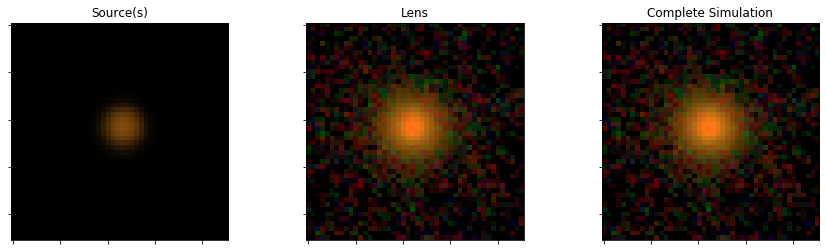

0.17112030661180097


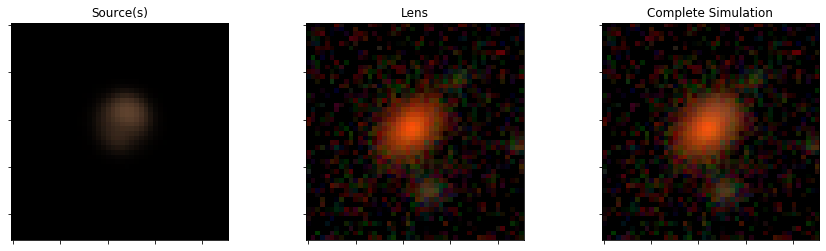

0.046904835678802215


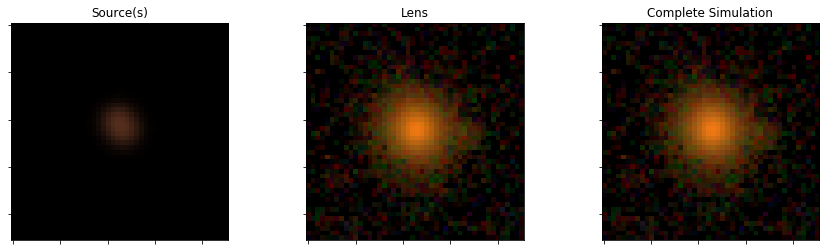

100


In [4]:
#19712 lens cutouts
path = '/Users/jimenagonzalez/research/DSPL/Simulations-Double-Source-Gravitational-Lensing/'
ids = pd.read_csv(path + 'Data/all_data_sim.csv')['COADD_OBJECT_ID'].sample(frac = 1)
x = complete_simulations(100, ids)
print(len(x))